In [16]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Vignesh T\\Downloads\\Top_Influencers.csv")

In [3]:
df.head(10)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
6,7,\nkimkardashian,91,330.7m,3.5m,5.7k,0.005,1.7m,19.8b,United States
7,8,\nbeyonce,92,276.1m,3.6m,2.0k,0.008,2.2m,7.3b,United States
8,9,\nkhloekardashian,89,273.9m,2.4m,4.1k,0.002,404.7k,9.8b,United States
9,10,\njustinbieber,91,260.0m,1.9m,7.4k,0.007,1.7m,14.0b,Canada


In [4]:
df.tail()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil
199,200,\nnancyajram,81,33.4m,382.5k,3.8k,0.004,128.2k,1.5b,France


In [5]:
df.shape

(200, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [13]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [14]:
df['Channel Info'] = df['Channel Info'].str.replace('\n','')

In [17]:
# converted k, m, b numeric
number_liste=[ 'Followers', 'Avg. Likes', 'Posts','New Post Avg. Likes','Total Likes']

for i in number_liste:
    lst =  df[i]
    tbl = {'k':1000, 'm': 1000000, 'b': 1000000000,}
    df[i] = [int(i) for i in (re.sub(r'([\d\.]+)(k|m|b)', lambda v: str(int(float(v.groups()[0]) * tbl[v.groups()[1]])), i) for i in lst)]

In [18]:
df[df['Country Or Region']=='Turkey']

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
58,59,marvel,82,66599999,330500,7200,0.004,289700,2400000000,Turkey
142,143,britneyspears,80,42100000,511200,3100,0.007,285900,1600000000,Turkey


In [19]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000,8700000,3400,0.013,6300000,29100000000,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,57400000000,United States
2,3,leomessi,90,363900000,6700000,915,0.010,3500000,6100000000,NaN
3,4,selenagomez,93,348800000,6100000,1900,0.005,1700000,11400000000,United States
4,5,therock,91,339400000,1800000,6800,0.003,932000,12600000000,United States


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,200.0,1.005000e+02,5.787918e+01,1.0,5.075000e+01,1.005000e+02,1.502500e+02,2.000000e+02
Influence Score,200.0,8.185000e+01,8.875323e+00,22.0,8.000000e+01,8.400000e+01,8.600000e+01,9.300000e+01
Followers,200.0,7.849100e+07,7.492015e+07,33400000.0,4.067500e+07,5.095000e+07,7.050000e+07,4.852000e+08
Avg. Likes,200.0,1.785050e+06,2.192133e+06,63500.0,4.990500e+05,1.100000e+06,2.125000e+06,1.540000e+07
Posts,200.0,3.460425e+03,3.327882e+03,20.0,9.382500e+02,2.100000e+03,5.025000e+03,1.690000e+04
60-Day Eng Rate,200.0,1.916000e-02,3.257731e-02,0.0,4.000000e-03,9.500000e-03,1.725000e-02,2.500000e-01
New Post Avg. Likes,200.0,1.224083e+06,1.857624e+06,0.0,2.187750e+05,5.671500e+05,1.300000e+06,1.290000e+07
Total Likes,200.0,3.644949e+09,5.563069e+09,22800000.0,1.075000e+09,2.050000e+09,4.025000e+09,5.740000e+10


In [22]:
correlation_matrix = df[['Followers', 'Avg. Likes', 'Posts','New Post Avg. Likes','Total Likes']].corr()

print(correlation_matrix)

                     Followers  Avg. Likes     Posts  New Post Avg. Likes  \
Followers             1.000000    0.346829  0.069171             0.260764   
Avg. Likes            0.346829    1.000000 -0.348795             0.892784   
Posts                 0.069171   -0.348795  1.000000            -0.285154   
New Post Avg. Likes   0.260764    0.892784 -0.285154             1.000000   
Total Likes           0.667546    0.361296  0.232038             0.351335   

                     Total Likes  
Followers               0.667546  
Avg. Likes              0.361296  
Posts                   0.232038  
New Post Avg. Likes     0.351335  
Total Likes             1.000000  


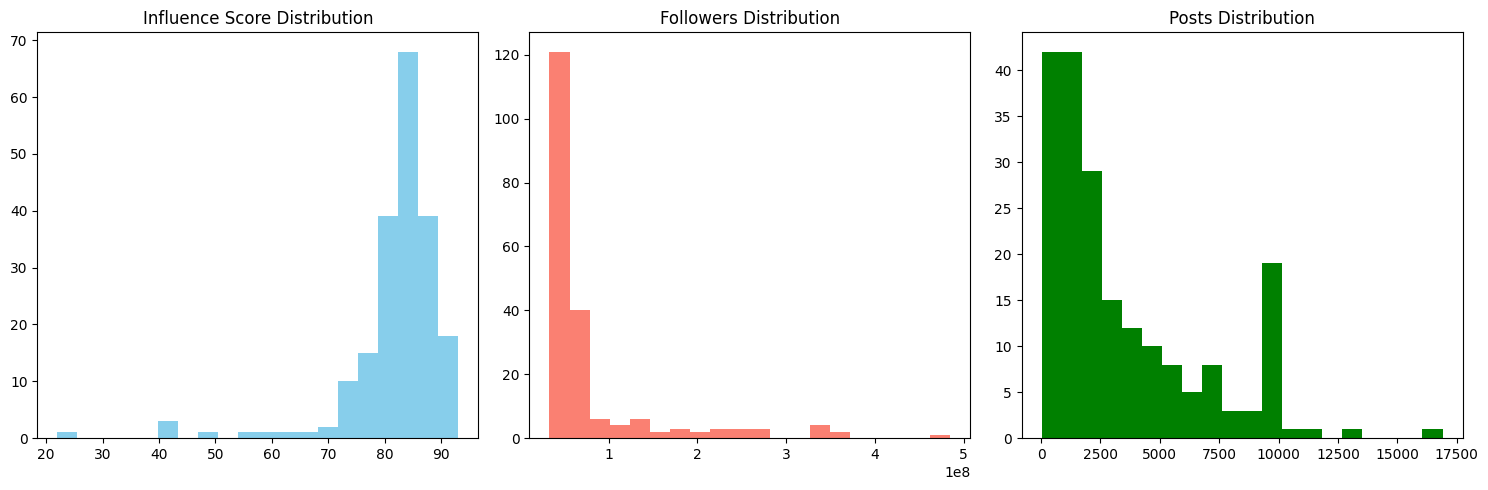

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Influence Score'], bins=20, color='skyblue')
plt.title('Influence Score Distribution')

plt.subplot(1, 3, 2)
plt.hist(df['Followers'], bins=20, color='salmon')
plt.title('Followers Distribution')

plt.subplot(1, 3, 3)
plt.hist(df['Posts'], bins=20, color='green')
plt.title('Posts Distribution')

plt.tight_layout()
plt.show()


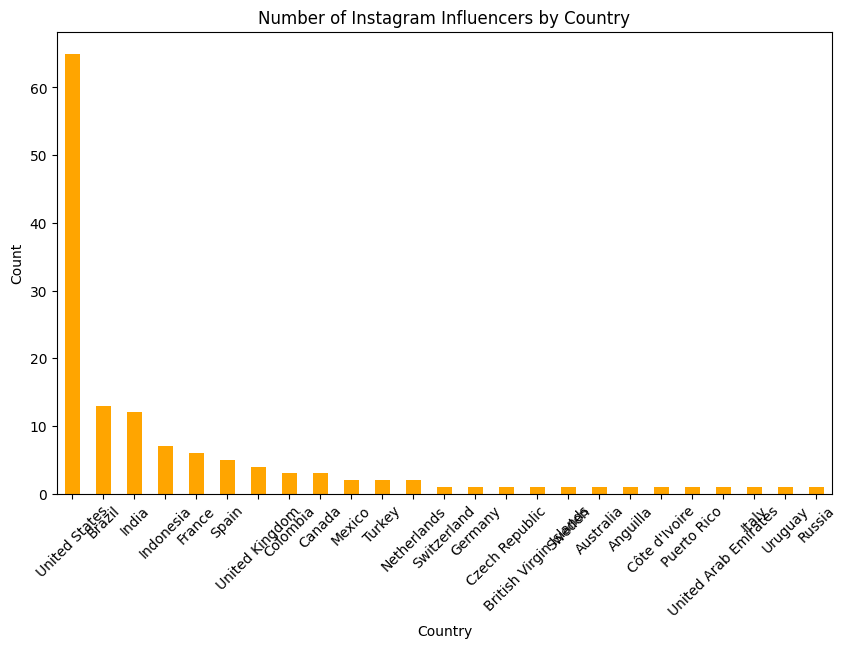

In [25]:
plt.figure(figsize=(10, 6))
df['Country Or Region'].value_counts().plot(kind='bar', color='orange')
plt.title('Number of Instagram Influencers by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [28]:
top_10_followers = df.nlargest(10, 'Followers')
top_10_average_likes = df.nlargest(10, 'Avg. Likes')
top_10_total_likes = df.nlargest(10, 'Total Likes')

print("Top 10 Influencers based on Followers:")
print(top_10_followers[['Influence Score', 'Followers']])

print("Top 10 Influencers based on Average Likes:")
print(top_10_average_likes[['Influence Score', 'Avg. Likes']])

print("Top 10 Influencers based on Total Likes:")
print(top_10_total_likes[['Influence Score', 'Total Likes']])


Top 10 Influencers based on Followers:
   Influence Score  Followers
0               92  485200000
1               91  370700000
2               90  363900000
3               93  348800000
4               91  339400000
5               92  333000000
6               91  330700000
7               92  276100000
8               89  273900000
9               91  260000000
Top 10 Influencers based on Average Likes:
     Influence Score  Avg. Likes
96                83    15400000
131               83    14400000
165               83    10600000
0                 92     8700000
32                73     8400000
1                 91     8199999
2                 90     6700000
3                 93     6100000
38                70     6000000
22                87     5900000
Top 10 Influencers based on Total Likes:
    Influence Score  Total Likes
1                91  57400000000
0                92  29100000000
22               87  20800000000
6                91  19800000000
5                92

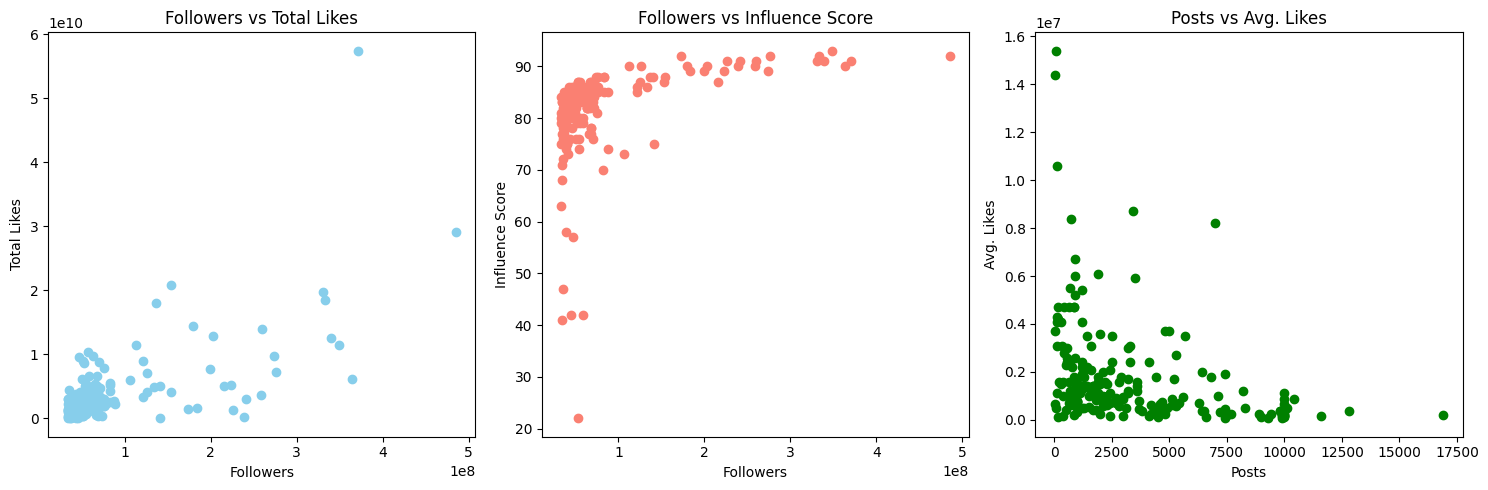

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Followers'], df['Total Likes'], color='skyblue')
plt.title('Followers vs Total Likes')
plt.xlabel('Followers')
plt.ylabel('Total Likes')

plt.subplot(1, 3, 2)
plt.scatter(df['Followers'], df['Influence Score'], color='salmon')
plt.title('Followers vs Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')

plt.subplot(1, 3, 3)
plt.scatter(df['Posts'], df['Avg. Likes'], color='green')
plt.title('Posts vs Avg. Likes')
plt.xlabel('Posts')
plt.ylabel('Avg. Likes')

plt.tight_layout()
plt.show()
